# Aktia maantiejuoksucup 2018-2019

Kai Puolamäki 10.5.2020

The purpose of this is to demonstrate how to fetch and preprocess dataset and do some initial looking.

The main point is to have sufficient documentation and to script as much as possible: this way if you would like to do the data fetching or preprosessing differently in the future (e.g., you would like to do the same for other years!) then everything would be easy and minimal manual labour would be needed. A good way is to use a Makefile.

This will also make publishing and/or sharing of the data and code much easier. It is easiest if you do the documentation and coding at the same time you fetch the data.

This is important, because some argue that 80% or more of the time in data sciences is spent on dealing with data. Therefore, even small time savings in data preprocessing may mean that you have lots of more time to do the actual analysis.

The data is about 10K races that took place in Vantaa during 2018-2019 during Aktia Maantiejuoksucup, see <https://www.ku-58.fi/kilpailut/maantie-ja-maastokilpailut/aktia_maantiejuoksu_cup/>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
aktia = pd.read_csv("aktia.csv")
weather = pd.read_csv("weather.csv")

In [4]:
# Take a look at the data tables
aktia

,rank,bib,name,club,time,race,seconds
0,1,535,Saleva Eero,Helsingin Kisaveikot,31:57,1,1917
1,2,537,Harjamäki Joonas,Viipurin Urheilijat,32:38,1,1958
2,3,589,Kero Jukka,Turun Urheiluliitto,32:51,1,1971
3,4,536,Heikkilä Niklas,Kuusankosken urheiluseura,33:07,1,1987
4,5,44,Huusko Samuli,Kenttäurheilija-58,33:13,1,1993
5,6,624,Hakala Juuso,Turun Urheiluliitto,33:15,1,1995
6,7,19,Fishaye Samuel,Leppävaaran Sisu,33:16,1,1996
7,8,166,Salo Jukka,Kenttäurheilija-58,33:20,1,2000
8,9,519,Lappalainen Lauri,Team Wassu,33:45,1,2025
9,10,550,Kumpula Jussi,Espoo,34:19,1,2059


In [5]:
# lets drop the time variable (we don't really need it as we have the time in seconds)
aktia = aktia.drop("time",axis=1)

In [ ]:
aktia

In [13]:
# take look at the weather during the races
weather

,race,cloud,airpressure,humidity,precipitation,snowdepth,temp,cond,visibility,wd,gust,ws
0,1,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9
1,2,8,1028.6,95,0.0,0,-0.5,-1.2,41940,359,4.9,3.8
2,3,0,1005.7,94,0.0,32,-5.6,-6.4,47380,259,3.4,2.6
3,4,8,1001.2,99,0.1,47,1.1,1.0,4390,189,8.9,6.6
4,5,8,1012.5,99,0.0,21,2.5,2.3,3670,217,13.8,10.0


In [14]:
# lets make the race number index in the weather table
weather = weather.set_index("race")
weather

,cloud,airpressure,humidity,precipitation,snowdepth,temp,cond,visibility,wd,gust,ws
race,,,,,,,,,,,
1,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9
2,8,1028.6,95,0.0,0,-0.5,-1.2,41940,359,4.9,3.8
3,0,1005.7,94,0.0,32,-5.6,-6.4,47380,259,3.4,2.6
4,8,1001.2,99,0.1,47,1.1,1.0,4390,189,8.9,6.6
5,8,1012.5,99,0.0,21,2.5,2.3,3670,217,13.8,10.0


In [15]:
# describe method gives you basics stats about the data. In R you would use summary().
aktia.describe()

,rank,bib,race,seconds
count,1343.000000,1343.000000,1343.000000,1343.000000
mean,145.307520,332.847357,2.873418,2701.207744
std,92.680388,240.760286,1.541401,403.188956
min,1.000000,1.000000,1.000000,1877.000000
25%,67.000000,117.000000,1.000000,2411.000000
50%,135.000000,281.000000,3.000000,2655.000000
75%,213.500000,572.000000,4.000000,2947.500000
max,357.000000,750.000000,5.000000,4724.000000


In [16]:
weather.describe()

,cloud,airpressure,humidity,precipitation,snowdepth,temp,cond,visibility,wd,gust,ws
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,5.600000,1016.080000,94.200000,0.020000,20.000000,0.920000,0.060000,28532.000000,259.60000,7.740000,5.780000
std,3.577709,13.829931,6.140033,0.044721,20.457273,4.616492,4.178277,22452.573795,64.97538,4.030261,2.851666
min,0.000000,1001.200000,84.000000,0.000000,0.000000,-5.600000,-6.400000,3670.000000,189.00000,3.400000,2.600000
25%,4.000000,1005.700000,94.000000,0.000000,0.000000,-0.500000,-1.200000,4390.000000,217.00000,4.900000,3.800000
50%,8.000000,1012.500000,95.000000,0.000000,21.000000,1.100000,1.000000,41940.000000,259.00000,7.700000,5.900000
75%,8.000000,1028.600000,99.000000,0.000000,32.000000,2.500000,2.300000,45280.000000,274.00000,8.900000,6.600000
max,8.000000,1032.400000,99.000000,0.100000,47.000000,7.100000,4.600000,47380.000000,359.00000,13.800000,10.000000


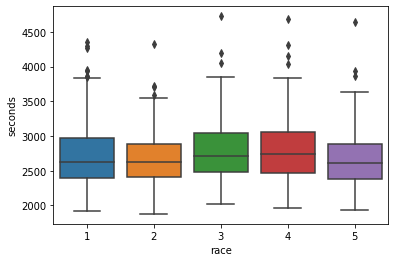

In [17]:
# lets see how race times behave in different races
sns.boxplot(x="race",y="seconds",data=aktia)

In [18]:
# looks similar...
# then lets take a look at the mean times of various competitors
times = aktia[["name","seconds"]].groupby("name").agg(["mean"])

In [19]:
# 10 fastest competitors
times.iloc[np.argsort(times["seconds"]["mean"])[:10]]

,seconds
,mean
name,
Granberg Hannu,1877.0
Saleva Eero,1925.0
Jantunen Panu,1941.0
Valido Toni,1952.0
Heikkilä Niklas,1987.0
Kero Jukka,1991.0
Hakala Juuso,1995.0
Huusko Samuli,2009.0


In [20]:
times.describe()

,seconds
,mean
count,603.000000
mean,2695.829878
std,408.321296
min,1877.000000
25%,2399.500000
50%,2662.000000
75%,2941.250000
max,4532.800000


//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetoo

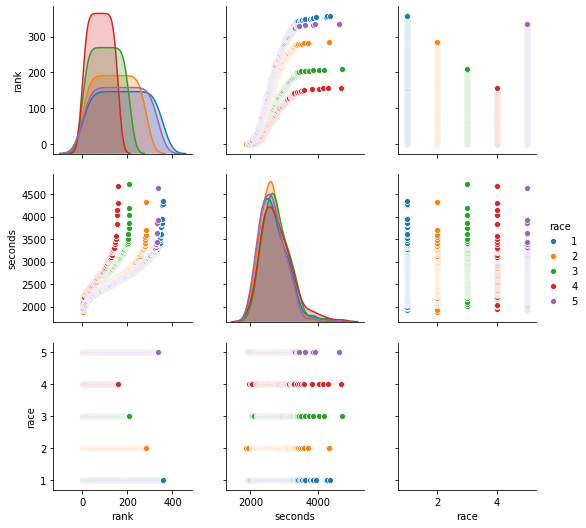

In [21]:
# seaborn pairplot is quite nice. 
# This view might not be that informative however... You notice that the time distributions are slightly 
# different for different races. As we noticed before, races 3 and 4 appear to be slowest.
sns.pairplot(aktia[["rank","seconds","race"]],hue="race")

In [22]:
# lets then merge the weather data to the dataframe.
data = aktia.merge(weather,on="race",how="outer")
data

,rank,bib,name,club,race,seconds,cloud,airpressure,humidity,precipitation,snowdepth,temp,cond,visibility,wd,gust,ws
0,1,535,Saleva Eero,Helsingin Kisaveikot,1,1917,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9
1,2,537,Harjamäki Joonas,Viipurin Urheilijat,1,1958,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9
2,3,589,Kero Jukka,Turun Urheiluliitto,1,1971,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9
3,4,536,Heikkilä Niklas,Kuusankosken urheiluseura,1,1987,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9
4,5,44,Huusko Samuli,Kenttäurheilija-58,1,1993,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9
5,6,624,Hakala Juuso,Turun Urheiluliitto,1,1995,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9
6,7,19,Fishaye Samuel,Leppävaaran Sisu,1,1996,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9
7,8,166,Salo Jukka,Kenttäurheilija-58,1,2000,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9
8,9,519,Lappalainen Lauri,Team Wassu,1,2025,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9
9,10,550,Kumpula Jussi,Espoo,1,2059,4,1032.4,84,0.0,0,7.1,4.6,45280,274,7.7,5.9


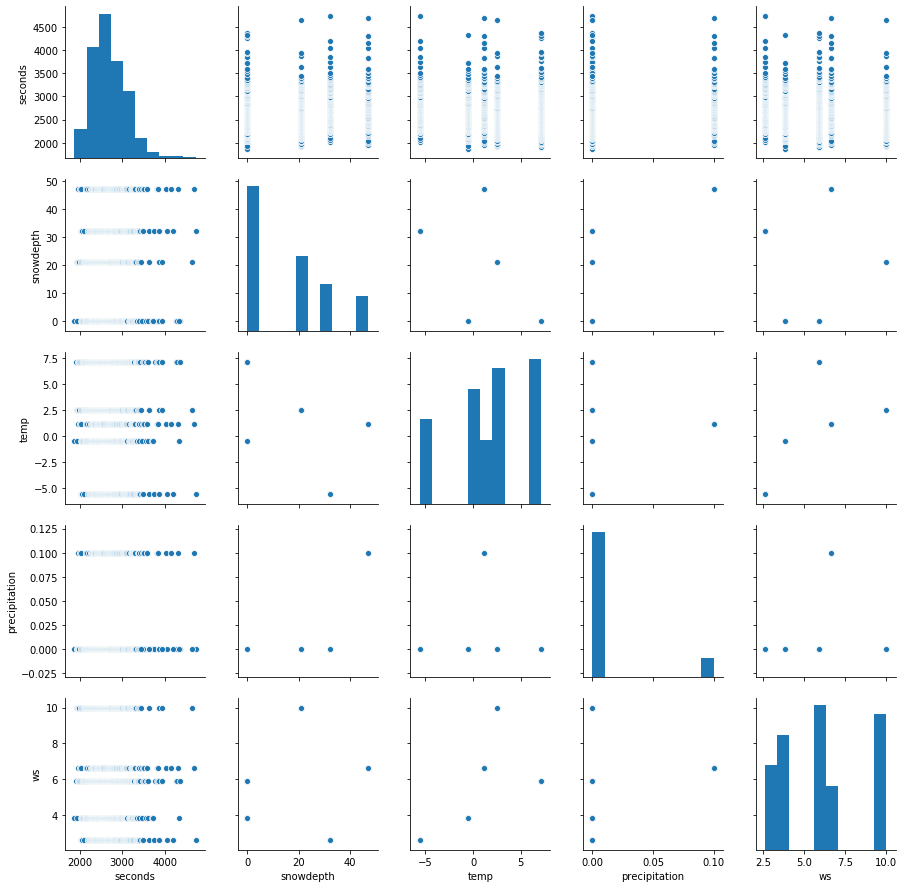

In [23]:
sns.pairplot(data,vars=["seconds","snowdepth","temp","precipitation","ws"])

In [24]:
data.describe()

,rank,bib,race,seconds,cloud,airpressure,humidity,precipitation,snowdepth,temp,cond,visibility,wd,gust,ws
count,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.00000,1343.000000,1343.000000,1343.00000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000
mean,145.307520,332.847357,2.873418,2701.207744,5.691735,1018.80685,93.388682,0.011765,15.74758,1.663142,0.664408,29710.655249,265.422189,8.101489,6.047431
std,92.680388,240.760286,1.541401,403.188956,2.981860,11.94282,5.968566,0.032231,16.77695,4.157100,3.648185,19736.183789,56.143270,3.719622,2.619432
min,1.000000,1.000000,1.000000,1877.000000,0.000000,1001.20000,84.000000,0.000000,0.00000,-5.600000,-6.400000,3670.000000,189.000000,3.400000,2.600000
25%,67.000000,117.000000,1.000000,2411.000000,4.000000,1005.70000,84.000000,0.000000,0.00000,-0.500000,-1.200000,4390.000000,217.000000,4.900000,3.800000
50%,135.000000,281.000000,3.000000,2655.000000,8.000000,1012.50000,95.000000,0.000000,21.00000,2.500000,2.300000,41940.000000,259.000000,7.700000,5.900000
75%,213.500000,572.000000,4.000000,2947.500000,8.000000,1032.40000,99.000000,0.000000,32.00000,7.100000,4.600000,45280.000000,274.000000,8.900000,6.600000
max,357.000000,750.000000,5.000000,4724.000000,8.000000,1032.40000,99.000000,0.100000,47.00000,7.100000,4.600000,47380.000000,359.000000,13.800000,10.000000


In [25]:
# Lets then make a new data where we make each of the competitors attributes of their own...
data2 = pd.concat([data,pd.get_dummies(data["name"])],axis=1)
data2

,rank,bib,name,club,race,seconds,cloud,airpressure,humidity,precipitation,...,Widbom Herman,Widbom Kalle,Willamo Anette,Ylä-Kujala Sanni,Zych Monika,favale Joonas,Äikäs Marko,Åkerman Milla,Åvall Michaela,Öman Johanna
0,1,535,Saleva Eero,Helsingin Kisaveikot,1,1917,4,1032.4,84,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,537,Harjamäki Joonas,Viipurin Urheilijat,1,1958,4,1032.4,84,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,589,Kero Jukka,Turun Urheiluliitto,1,1971,4,1032.4,84,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,536,Heikkilä Niklas,Kuusankosken urheiluseura,1,1987,4,1032.4,84,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5,44,Huusko Samuli,Kenttäurheilija-58,1,1993,4,1032.4,84,0.0,...,0,0,0,0,0,0,0,0,0,0
5,6,624,Hakala Juuso,Turun Urheiluliitto,1,1995,4,1032.4,84,0.0,...,0,0,0,0,0,0,0,0,0,0
6,7,19,Fishaye Samuel,Leppävaaran Sisu,1,1996,4,1032.4,84,0.0,...,0,0,0,0,0,0,0,0,0,0
7,8,166,Salo Jukka,Kenttäurheilija-58,1,2000,4,1032.4,84,0.0,...,0,0,0,0,0,0,0,0,0,0
8,9,519,Lappalainen Lauri,Team Wassu,1,2025,4,1032.4,84,0.0,...,0,0,0,0,0,0,0,0,0,0
9,10,550,Kumpula Jussi,Espoo,1,2059,4,1032.4,84,0.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data2.columns[7:]

Index(['airpressure', 'humidity', 'precipitation', 'snowdepth', 'temp', 'cond',
       'visibility', 'wd', 'gust', 'ws',
       ...
       'Widbom Herman', 'Widbom Kalle', 'Willamo Anette', 'Ylä-Kujala Sanni',
       'Zych Monika', 'favale Joonas', 'Äikäs Marko', 'Åkerman Milla',
       'Åvall Michaela', 'Öman Johanna'],
      dtype='object', length=613)

In [27]:
# Fit a linear model, separating the effects of various competetors and weather.
model = sm.OLS(data2["seconds"],data2.iloc[:,7:])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                seconds   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     62.27
Date:                Mon, 11 May 2020   Prob (F-statistic):               0.00
Time:                        11:07:10   Log-Likelihood:                -7305.6
No. Observations:                1343   AIC:                         1.583e+04
Df Residuals:                     736   BIC:                         1.898e+04
Df Model:                         606                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
airpressure                   2.5350      0.026     98.001      0.000       2.484       2.586
humidity                      0.5094      0.463      1.100      0.272      -0.400       1.419
precipitation                 0.0220      0.009      2.468      0.014       0.005       0.040
snowdepth                     4.3955      0.416     10.568      0.000       3.579       5.212
temp                         -0.1430      0.479     -0.299      0.765      -1.083       0.797
cond                         -0.1055      0.417     -0.253      0.800      -0.924       0.713
visibility                    0.0014      0.000      6.040      0.000       0.001       0.002
wd                           -0.1046      0.127     -0.826      0.409      -0.353       0.144
gust                         -0.9989      0.269     -3.719      0.000      -1.526      -0.472
ws                           -0.6859      0.171     -4.009      0.000      -1.022      -0.350
Aakkula Riikka               49.5018     75.369      0.657      0.512     -98.463     197.466
Aakula Riikka                96.1518     43.510      2.210      0.027      10.734     181.570
Aalto Josefina              -56.0256     53.256     -1.052      0.293    -160.577      48.526
Aalto Martin                -80.2964     75.324     -1.066      0.287    -228.173      67.580
Aaltonen Toni                90.3735     53.277      1.696      0.090     -14.220     194.967
Absetz Ilmari               223.0845     43.526      5.125      0.000     137.634     308.535
Ahdevainio Juha            -177.3934     33.729     -5.259      0.000    -243.609    -111.178
Ahdinkallio Jussi          -352.2964     75.324     -4.677      0.000    -500.173    -204.420
Ahokas Jukka               -334.1934     33.729     -9.908      0.000    -400.409    -267.978
Ahokas Kati                 459.1518     43.510     10.553      0.000     373.734     544.570
Ahonen Jukka                 67.4893     37.683      1.791      0.074      -6.490     141.468
Airas Petro                  71.7036     75.324      0.952      0.341     -76.173     219.580
Aittola Antti              -360.6677     37.724     -9.561      0.000    -434.728    -286.608
Ala-Koukkari Mika           238.6027     53.276      4.479      0.000     134.011     343.194
Alanko Tero                  41.8169     43.489      0.962      0.337     -43.561     127.195
Alasalmi Teija             1578.7036     75.324     20.959      0.000    1430.827    1726.580
Alavalkama Satu             524.2452     75.338      6.959      0.000     376.342     672.148
Alden Jan                  -167.7548     75.338     -2.227      0.026    -315.658     -19.852
Alén Heikki                -204.2964     75.324     -2.712      0.007    -352.173     -56.420
Andreev Katja               711.6316     37.694     18.879      0.000     6

It appears that high values for the following weather factors make race times slower: airpressure, humidity, snowdepth, gust, wind speed

High values for the following weather factors make race times faster: precipitation, temperature, cond.

(Good exercise would be what we can really infer from all this, but I'll leave this for now.